In [177]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

In [178]:
company_ticker = "a"

data = pd.read_csv(f'datasets/Data/Stocks/{company_ticker}.us.txt')

print(data.shape)

data.describe()

(4521, 7)


,Open,High,Low,Close,Volume,OpenInt
count,4521.000000,4521.000000,4521.000000,4521.000000,4.521000e+03,4521.0
mean,27.856296,28.270442,27.452486,27.871357,3.993503e+06,0.0
std,12.940880,13.176000,12.711735,12.944389,2.665730e+06,0.0
min,7.223100,7.513900,7.087800,7.323800,0.000000e+00,0.0
25%,19.117000,19.435000,18.780000,19.089000,2.407862e+06,0.0
50%,24.456000,24.809000,24.159000,24.490000,3.460621e+06,0.0
75%,36.502000,37.046000,35.877000,36.521000,4.849809e+06,0.0
max,105.300000,109.370000,97.881000,107.320000,6.627751e+07,0.0


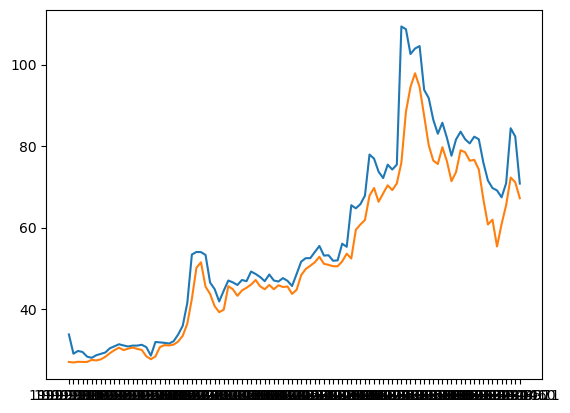

In [179]:
sub_data = data[:100]

plt.plot(sub_data['Date'], sub_data['High'])
plt.plot(sub_data['Date'], sub_data['Low'])


In [180]:
missing_values = data.isnull()

print(len([x for x in missing_values if x == True]))


0


Text(0.5, 0, 'Volume')

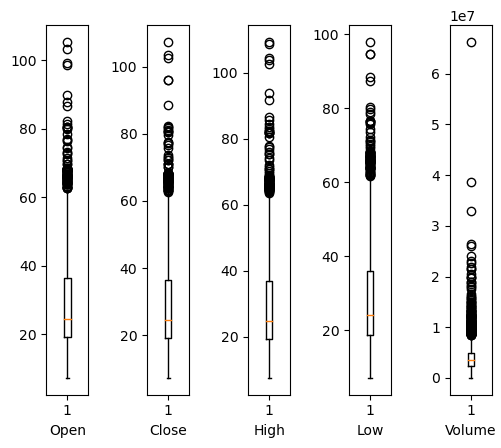

In [181]:
plt.subplot(1, 10, 1)
plt.boxplot(data['Open'])
plt.xlabel("Open")

plt.subplot(1, 10, 3)
plt.boxplot(data['Close'])
plt.xlabel("Close")

plt.subplot(1, 10, 5)
plt.boxplot(data['High'])
plt.xlabel("High")

plt.subplot(1, 10, 7)
plt.boxplot(data['Low'])
plt.xlabel("Low")

plt.subplot(1, 10, 9)
plt.boxplot(data['Volume'])
plt.xlabel("Volume")


In [182]:
def extract_bound(column):
    print(f" Column: {column}")
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    print(f"Lower: {lower_bound} \n Upper: {upper_bound}")

    return { "lower": lower_bound, "upper": upper_bound }

bounds = {}

for header in data.columns:
    if header == "Date" or header == 'OpenInt':
        continue
    bounds[header] = extract_bound(header)

print(bounds)
    

 Column: Open
Lower: -6.9605 
 Upper: 62.5795
 Column: High
Lower: -6.9815000000000005 
 Upper: 63.4625
 Column: Low
Lower: -6.865500000000001 
 Upper: 61.52250000000001
 Column: Close
Lower: -7.059000000000005 
 Upper: 62.669000000000004
 Column: Volume
Lower: -1255058.5 
 Upper: 8512729.5
{'Open': {'lower': -6.9605, 'upper': 62.5795}, 'High': {'lower': -6.9815000000000005, 'upper': 63.4625}, 'Low': {'lower': -6.865500000000001, 'upper': 61.52250000000001}, 'Close': {'lower': -7.059000000000005, 'upper': 62.669000000000004}, 'Volume': {'lower': -1255058.5, 'upper': 8512729.5}}


In [186]:
print(f"{data.size}")

data["Open"] = data["Open"].clip(lower=bounds["Open"]['lower'], upper=bounds["Open"]['upper'])
data["Close"] = data["Close"].clip(lower=bounds["Close"]['lower'], upper=bounds["Close"]['upper'])
data["High"] = data["High"].clip(lower=bounds["High"]['lower'], upper=bounds["High"]['upper'])
data["Low"] = data["Low"].clip(lower=bounds["Low"]['lower'], upper=bounds["Low"]['upper'])
data["Volume"] = data["Volume"].clip(lower=bounds["Volume"]['lower'], upper=bounds["Volume"]['upper'])

print(f"{data.size}")


31647
31647
